<a href="https://colab.research.google.com/github/super-sg/Data-Analysis-and-Modeling-Mini-Projects/blob/main/Viva%20credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Viva Credit Data Analysis and Modeling

# Romanian credit card issuer "Viva-Credit" wants to better predict the likelihood of default for its customers as well as identify the key drivers that determine its likelihood

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/viva_credit.csv')

In [3]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Handling null values, duplicate values and outliers :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [7]:
df.duplicated().sum()

np.int64(0)

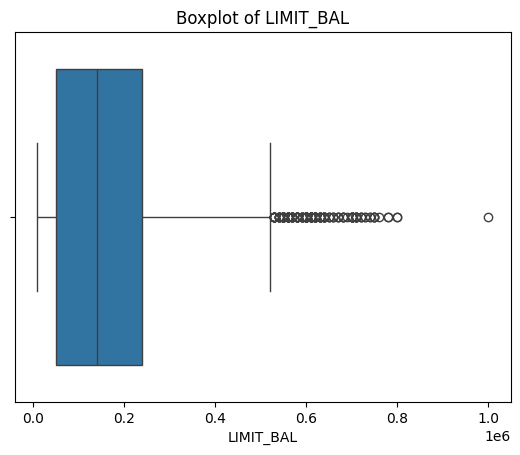

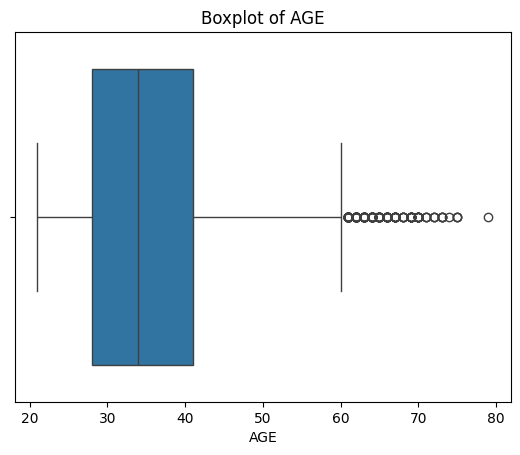

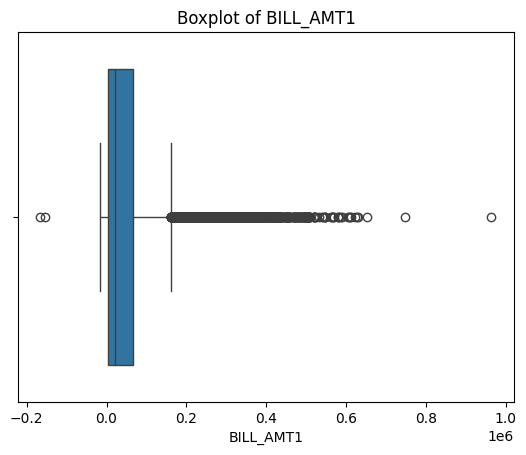

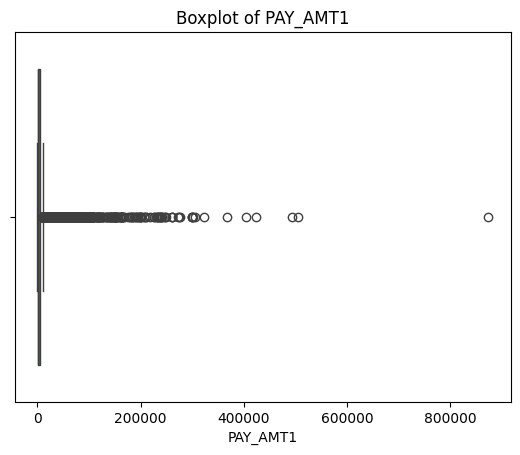

In [8]:
for col in ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['LIMIT_BAL'] >= Q1 - 1.5 * IQR) & (df['LIMIT_BAL'] <= Q3 + 1.5 * IQR)]

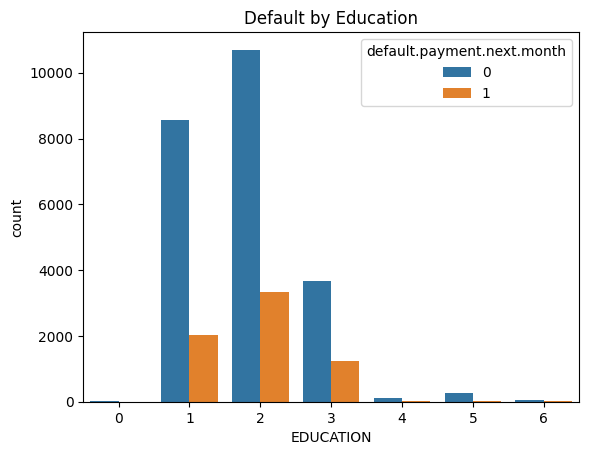

In [10]:
sns.countplot(data=df, x='EDUCATION', hue='default.payment.next.month')
plt.title("Default by Education")
plt.show()

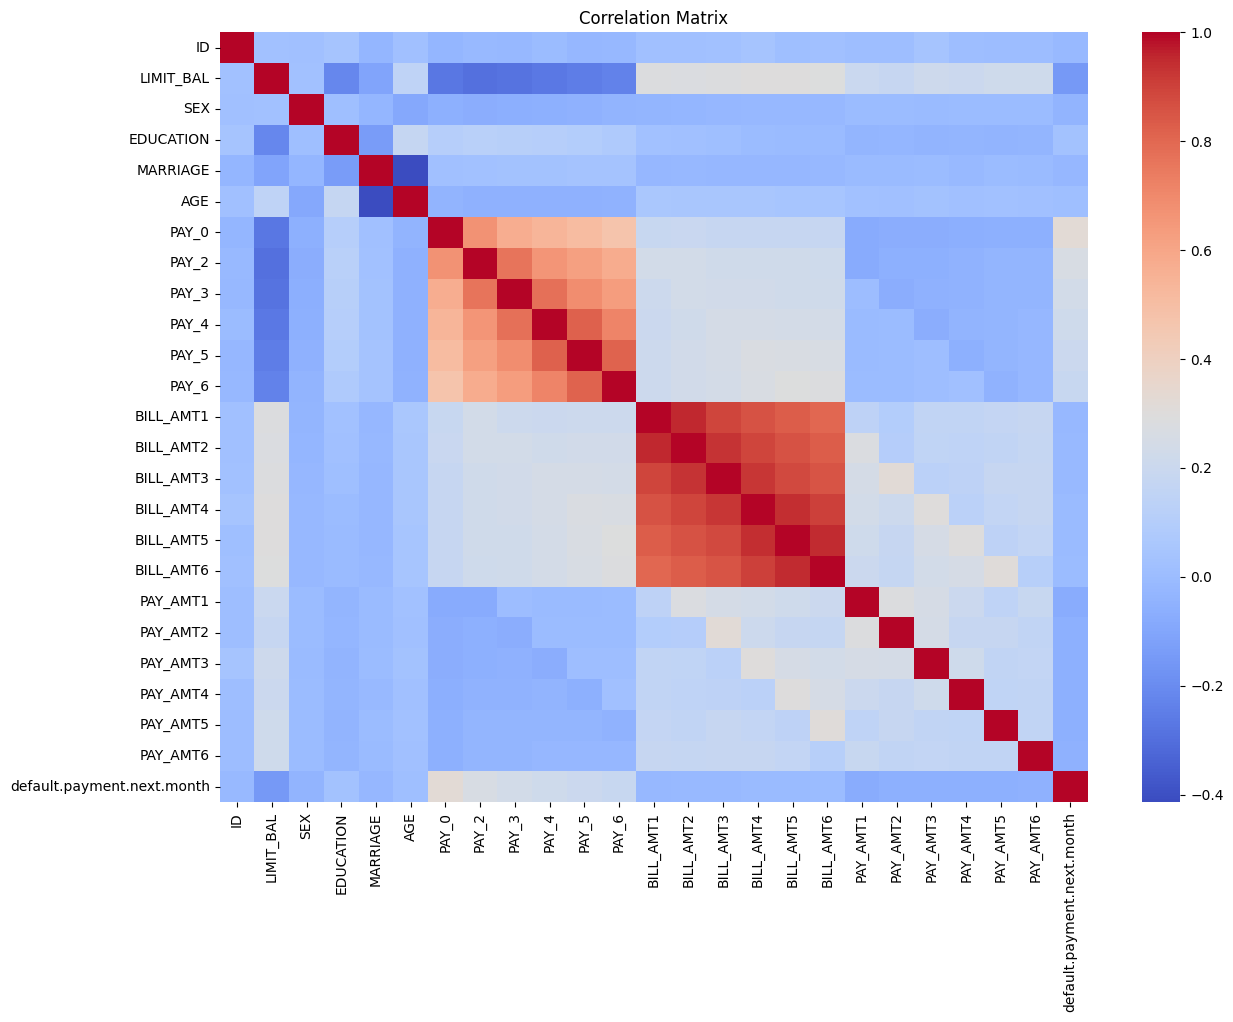

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

# Based on the heatmap, the PAY_ columns show strong positive correlations with default, while LIMIT_BAL shows a weak negative correlation, and the BILL_AMT and PAY_AMT columns have varying degrees of correlation with the target variable.

# Classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
X = df.drop(columns=['ID', 'default.payment.next.month'])
y = df['default.payment.next.month']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=50000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50000)

In [16]:
y_pred = model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.68      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

[[4538  149]
 [ 994  319]]


In [18]:
import numpy as np

feature_names = X.columns
coefficients = model.coef_[0]
importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance['AbsCoefficient'] = np.abs(importance['Coefficient'])
importance.sort_values(by='AbsCoefficient', ascending=False, inplace=True)
print(importance[['Feature', 'Coefficient']].head(10))

      Feature  Coefficient
5       PAY_0     0.570637
3    MARRIAGE    -0.262797
1         SEX    -0.194184
2   EDUCATION    -0.140501
6       PAY_2     0.113458
7       PAY_3     0.051028
8       PAY_4     0.045305
9       PAY_5     0.021368
10      PAY_6     0.018245
4         AGE     0.002854


# Based on the output, the PAY_0 column has the largest absolute coefficient, indicating it's the most important feature in this model for predicting default. The positive sign means that higher values in PAY_0 (representing a longer delay in payment in the most recent month) are associated with a higher likelihood of default. Other important features include MARRIAGE, SEX, and EDUCATION, though their coefficients are smaller in magnitude compared to PAY_0.